In [1]:
from ib_insync import *
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters; register_matplotlib_converters()

import datetime
import pytz
PYTZ_AMS = pytz.timezone('Europe/Amsterdam')
PYTZ_NYC = pytz.timezone('America/New_York')

In [2]:
util.startLoop()

In [3]:
ib = IB()
ib.connect(
	'127.0.0.1',
	4002, # TWS=7496, GTW=4001, # PAPER=7497
	clientId=3
)

ib.reqMarketDataType(1)

### US
TODO: add GEX

In [4]:
us_indices = {
    #"SPX" : Index("SPX", conId=416904, exchange="CBOE", currency="USD"),
    #"NQ " : Index("NQ", conId=11004958, exchange="GLOBEX", currency="USD"),
    # FAANG

    # ETFs (missing a DJI ETF)
    "SPY" : Stock("SPY", conId=756733, exchange="SMART", currency="USD"),
    "QQQ" : Stock("QQQ", conId=320227571, exchange="SMART", currency="USD"),
    "XLF" : Stock("XLF", conId=4215220, exchange="SMART", currency="USD"),
    "IWC" : Stock("IWC", conId=35445810, exchange="SMART", currency="USD"),
}

us_stocks = {
    "AMZN": Stock(conId=3691937, symbol='AMZN', exchange='SMART', primaryExchange='NASDAQ', currency='USD'),
    "AAPL": Stock(conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD' ),
    "MSFT": Stock(conId=272093, symbol='MSFT', exchange='SMART', primaryExchange='NASDAQ', currency='USD' ),
    "ZM":   Stock(conId=361181057, symbol='ZM', exchange='SMART', primaryExchange='NASDAQ', currency='USD'),
    # "WORK": Stock(conId=371114955, symbol='WORK', exchange='AMEX', primaryExchange='NYSE', currency='USD' ),
    "TSLA": Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD'),
    # "GS":   Stock(conId=4627828, symbol='GS', exchange='SMART', primaryExchange='NYSE', currency='USD'),
    # "JPM":  Stock(conId=1520593, symbol='JPM', exchange='SMART', primaryExchange='NYSE', currency='USD'),
    # "MS":   Stock(conId=2841574, symbol='MS', exchange='SMART', primaryExchange='NYSE', currency='USD'),
}

/Users/gbignardi/miniconda3/envs/pm/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


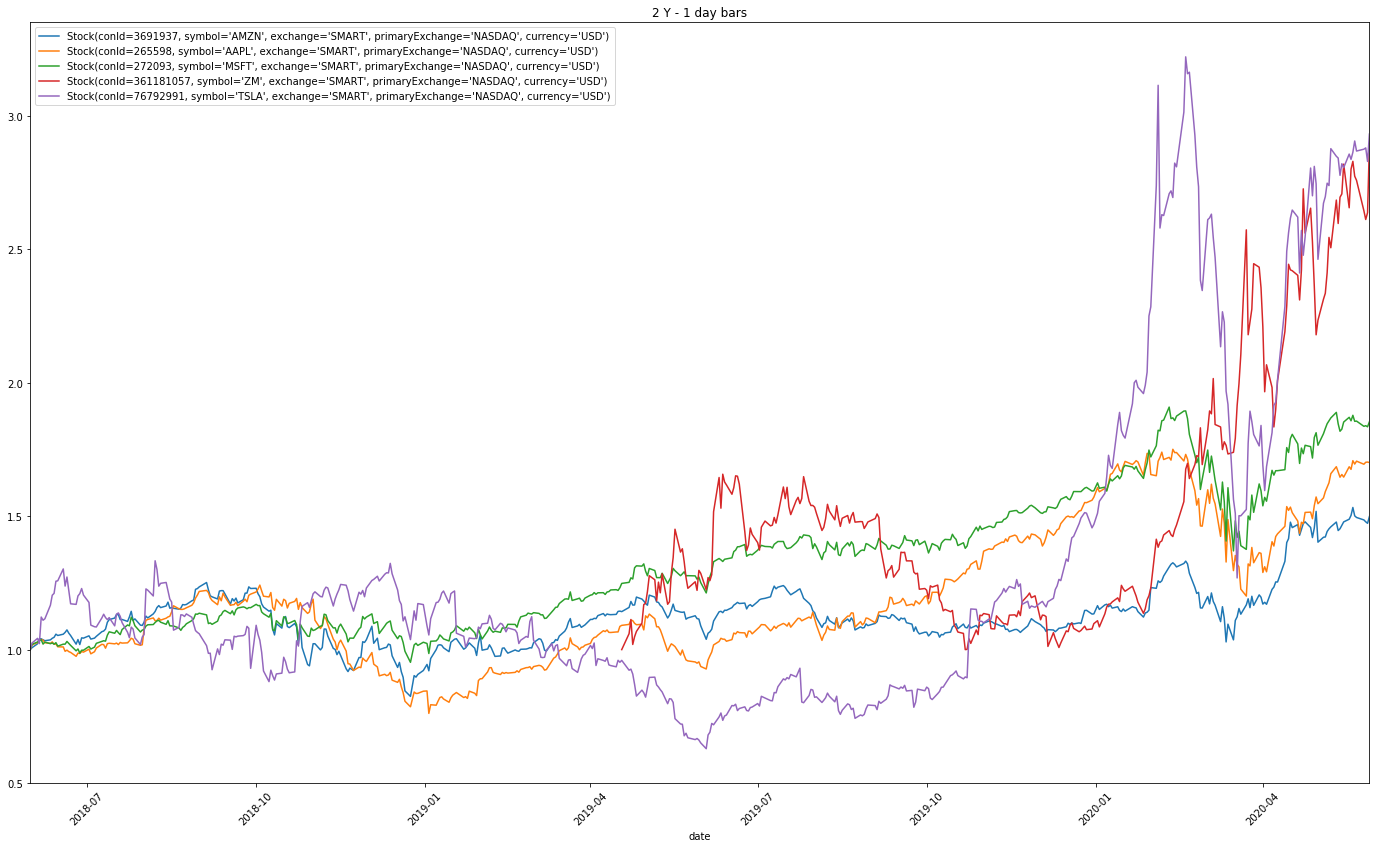

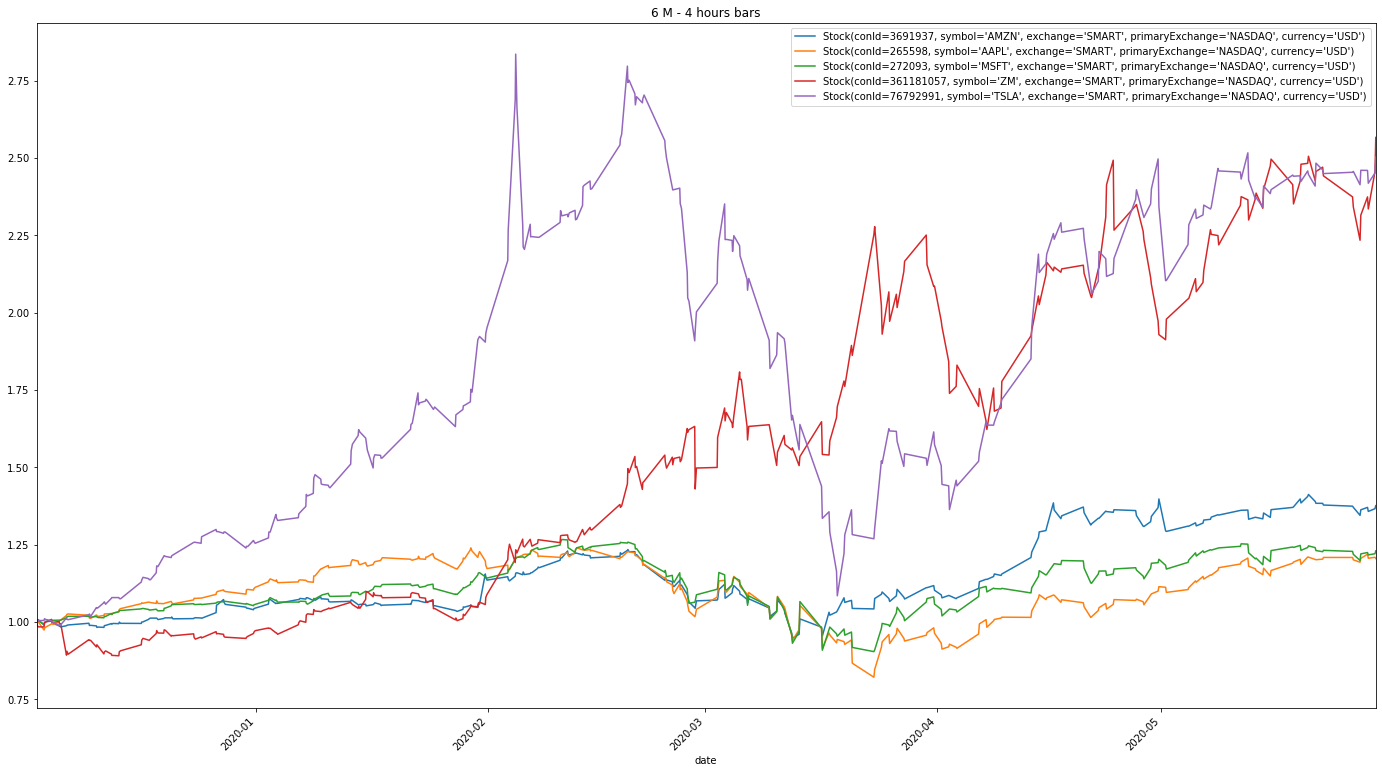

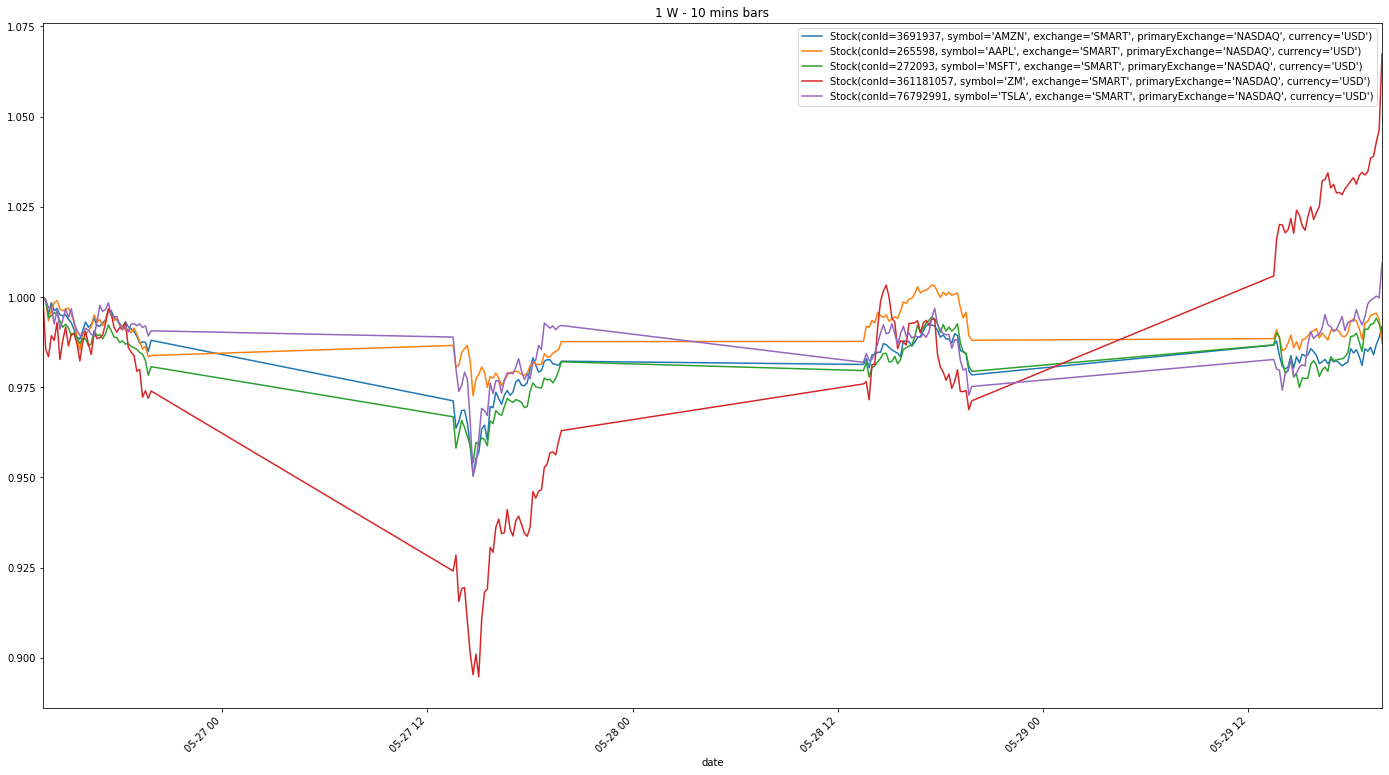

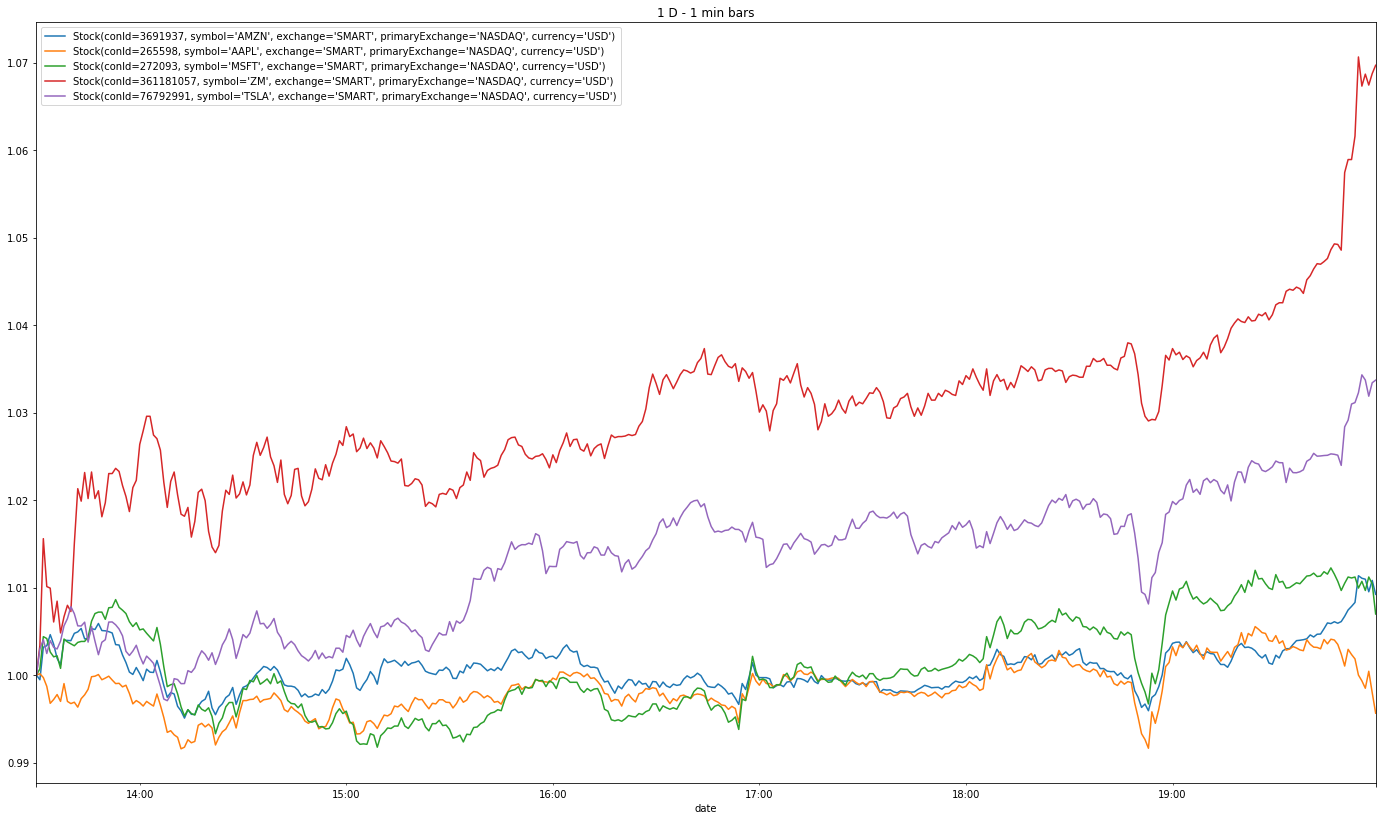

In [6]:
settings = [
    ("2 Y", "1 day"),
    ("6 M", "4 hours"),
    ("1 W", "10 mins"),
    ("1 D", "1 min"),
]
END = datetime.datetime.now().replace(tzinfo=datetime.timezone.utc)

for durationStr, barSizeSetting in settings:
    fig, ax = plt.subplots(figsize=(24,14))
    # ax.locator_params(axis='x', nbins=15)
    for name, contract in us_stocks.items():
        # print(durationStr, barSizeSetting, name)
        bars = ib.reqHistoricalData(
            contract,
            endDateTime=END,
            durationStr=durationStr,
            barSizeSetting=barSizeSetting,
            whatToShow="TRADES",
            useRTH=True,
            formatDate=2 # UTC
        )
        bars = util.df(bars)
        bars[contract] = bars["close"] /bars["close"][0]
        # bars["date"] = bars["date"].map(lambda x: x.strftime("%m/%d/%Y, %H:%M"))
        bars.plot(x="date", y=contract, ax=ax, title=f"{durationStr} - {barSizeSetting} bars")
        plt.xticks(rotation=45)

## Europe

No access to hist data, although got it in TWS

$BC @BVME fashion

$ZAL @IBIS tech (consumer goods)

$DHER @IBIS tech (food delivery)

$UCG @BVME banking

$G(enerali) @BVME banking

In [99]:
contract

(Contract(secType='STK', conId=262695149, symbol='UCG', exchange='SMART', primaryExchange='BVME', currency='EUR', localSymbol='UCG', tradingClass='UCG'),)

In [57]:
s = time.time()
bars = ib.reqHistoricalData(
    contract,
    endDateTime=None,
    durationStr="1 M",
    barSizeSetting="1 min",
    whatToShow="BID_ASK",
    useRTH=False,
    formatDate=2 # UTC
)
print(time.time() - s)

75.00325918197632


In [52]:
bars

[]

In [59]:
df2 = util.df(bars)

In [58]:
df.shape

(18397, 8)

In [60]:
df2.shape

(18436, 8)

In [61]:
df

,date,open,high,low,close,volume,average,barCount
0,2020-05-04 08:00:00+00:00,708.00,709.05,700.00,705.44,59,706.523,23
1,2020-05-04 08:01:00+00:00,703.46,705.00,702.51,702.51,10,703.345,5
2,2020-05-04 08:02:00+00:00,702.51,702.51,702.51,702.51,0,702.510,0
3,2020-05-04 08:03:00+00:00,702.51,702.51,702.51,702.51,0,702.510,0
4,2020-05-04 08:04:00+00:00,708.00,708.00,708.00,708.00,1,708.000,1
...,...,...,...,...,...,...,...,...
18392,2020-06-01 11:10:00+00:00,857.15,858.03,856.65,856.65,23,857.212,15
18393,2020-06-01 11:11:00+00:00,856.65,856.65,856.65,856.65,0,856.650,0
18394,2020-06-01 11:12:00+00:00,857.29,857.73,857.28,857.34,10,857.483,6
18395,2020-06-01 11:13:00+00:00,857.11,857.34,856.76,856.76,11,857.011,7


In [63]:
type(bars[0])

ib_insync.objects.BarData